<a href="https://colab.research.google.com/github/BaseChip/Api-Physik-App/blob/master/Aktienkurs_Boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pfad zur CSV-Datei
file_path = 'https://raw.githubusercontent.com/BaseChip/BoxPlotsGDS/main/BAYN.DE.csv'

# Anzahl der letzten Werte
days = 3

# Anzahl der Iterationen
plots = 5

# CSV-Datei einlesen
df = pd.read_csv(file_path)

# Umwandeln der 'Date' Spalte in datetime
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-18,64.150002,64.480003,63.709999,63.799999,61.237751,2419105.0
1,2022-05-19,63.230000,63.740002,63.009998,63.400002,60.853817,2747497.0
2,2022-05-20,63.730000,64.550003,63.689999,63.740002,61.180161,2625237.0
3,2022-05-23,64.400002,64.540001,63.759998,64.470001,61.880844,2202703.0
4,2022-05-24,63.889999,64.309998,63.290001,63.290001,60.748234,2582622.0
...,...,...,...,...,...,...,...
253,2023-05-12,53.529999,54.650002,53.480000,53.730000,53.730000,4215771.0
254,2023-05-15,54.099998,54.279999,52.189999,53.299999,53.299999,4194448.0
255,2023-05-16,53.240002,54.230000,53.200001,53.650002,53.650002,2431079.0
256,2023-05-17,53.560001,53.900002,53.049999,53.790001,53.790001,2184267.0


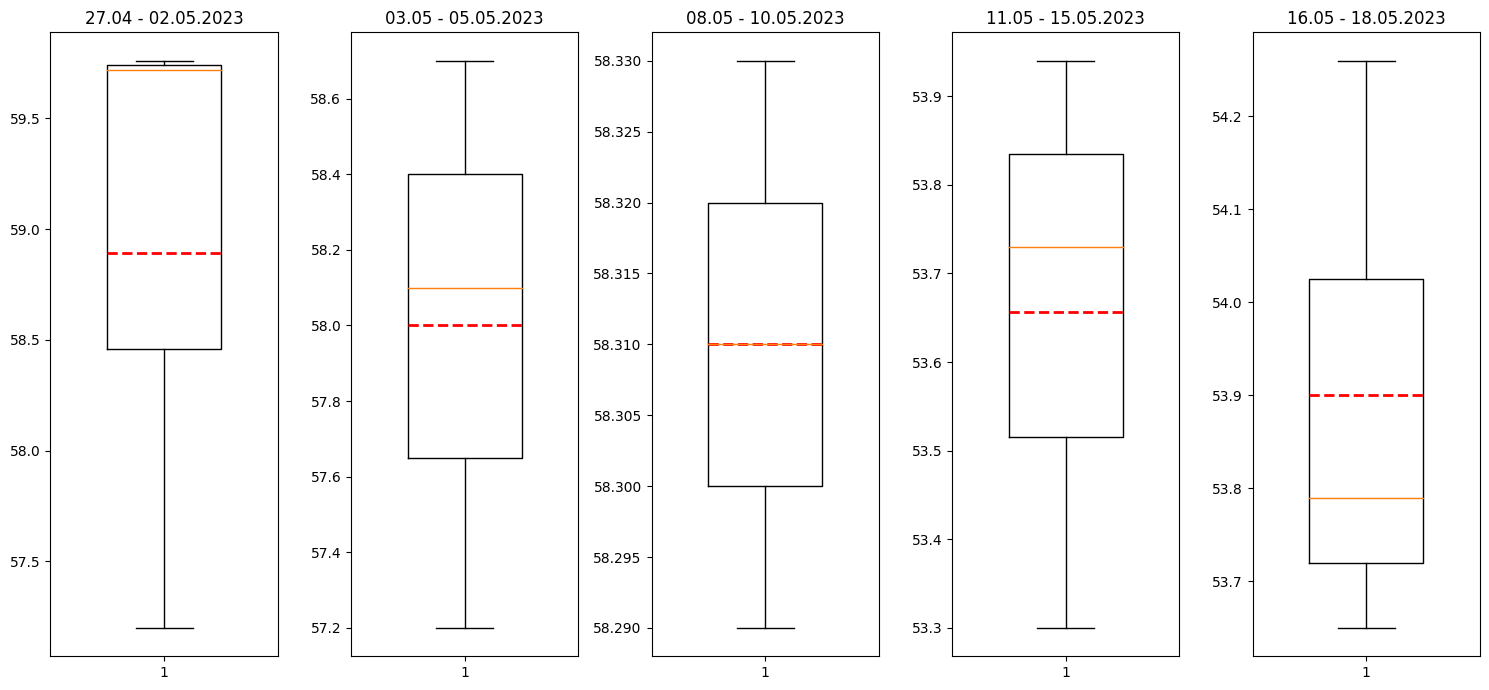

In [38]:
# Erstellen einer Figur und mehrerer Achsen (subplots)
# Wir setzen die Figurgröße auf 15x7 (Breite x Höhe)
fig, axs = plt.subplots(1, plots, figsize=(15, 7))

for i in range(plots):
    # Die letzten 'last_n_values' Werte der Spalten 'Close' und 'Date' auswählen
    data_close = df['Close'].tail(days * (plots - i))
    data_date = df['Date'].tail(days * (plots - i))

    # Nur die ersten 'last_n_values' Datenpunkte auswählen
    data_close = data_close.head(days)
    data_date = data_date.head(days)

    # Erstellen eines Boxplots aus der Serie, Breite der Boxen anpassen
    boxplot = axs[i].boxplot(data_close, widths=0.5)

    # Berechnen des Mittelwerts
    mean = np.mean(data_close)

    # Finden der x-Koordinaten der Box
    x = boxplot['boxes'][0].get_xdata()

    # Hinzufügen der Linie für den Mittelwert
    axs[i].plot([x[0], x[2]], [mean, mean], color='r', linestyle='dashed', linewidth=2)

    # Hinzufügen vom Titel mit dem Zeitraum
    axs[i].set_title(data_date.min().strftime('%d.%m') + ' - ' + data_date.max().strftime('%d.%m.%Y'))

# Anpassen des Layouts, um Überlappungen zu vermeiden
plt.tight_layout()

# Anzeigen der Figur
plt.show()
